In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay, RocCurveDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

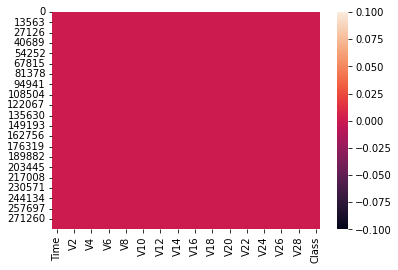

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df_corr = df.corr()
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [7]:
masking = np.triu(df_corr)

<AxesSubplot:title={'center':'Correlation Matrix'}>

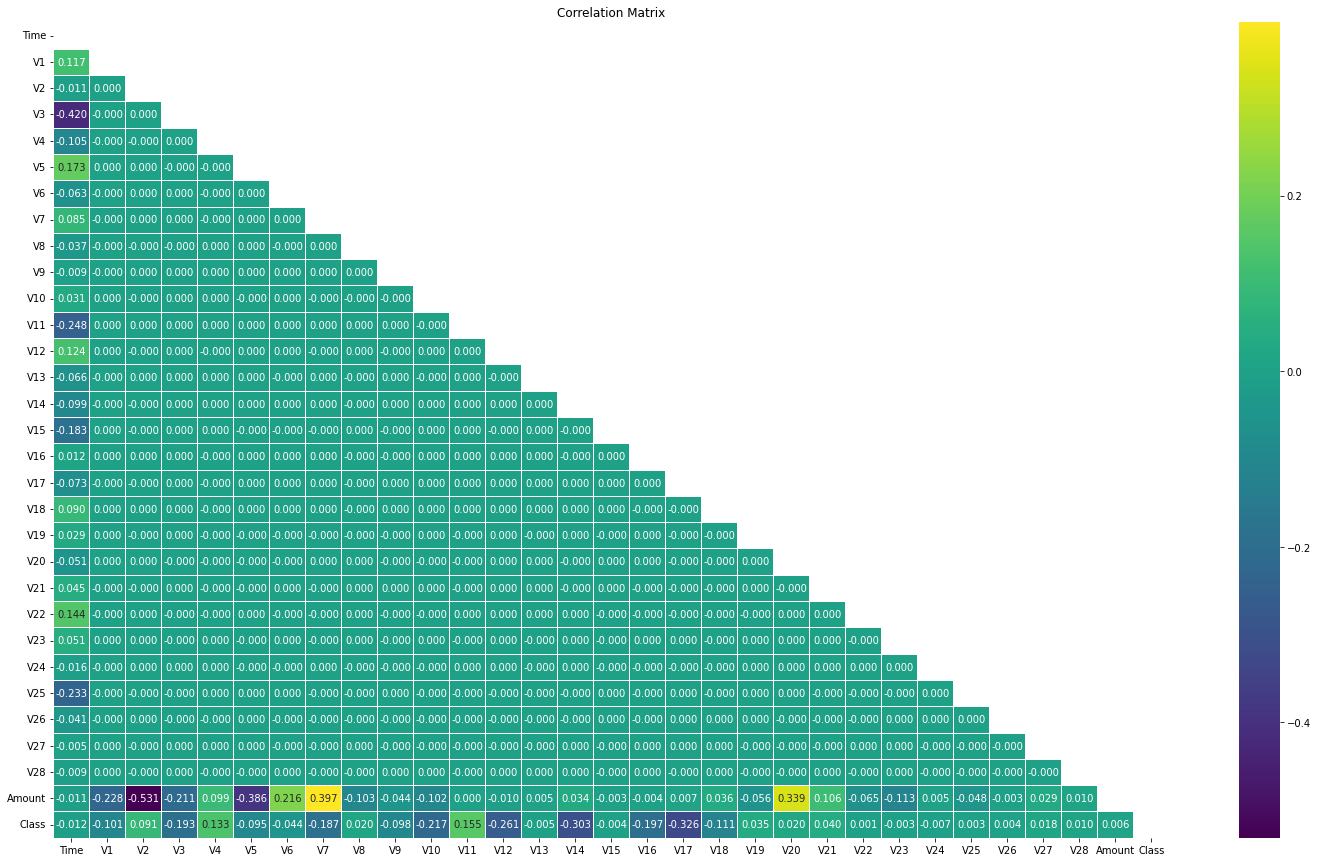

In [8]:
plt.figure(figsize = (25, 15))
plt.title('Correlation Matrix')
sns.heatmap(df_corr, cmap = 'viridis', annot = True, mask = masking, linecolor = 'white', linewidths = 0.5, fmt = '.3f')

<AxesSubplot:>

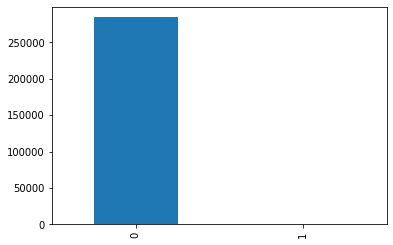

In [9]:
df['Class'].value_counts().plot(kind = 'bar')

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

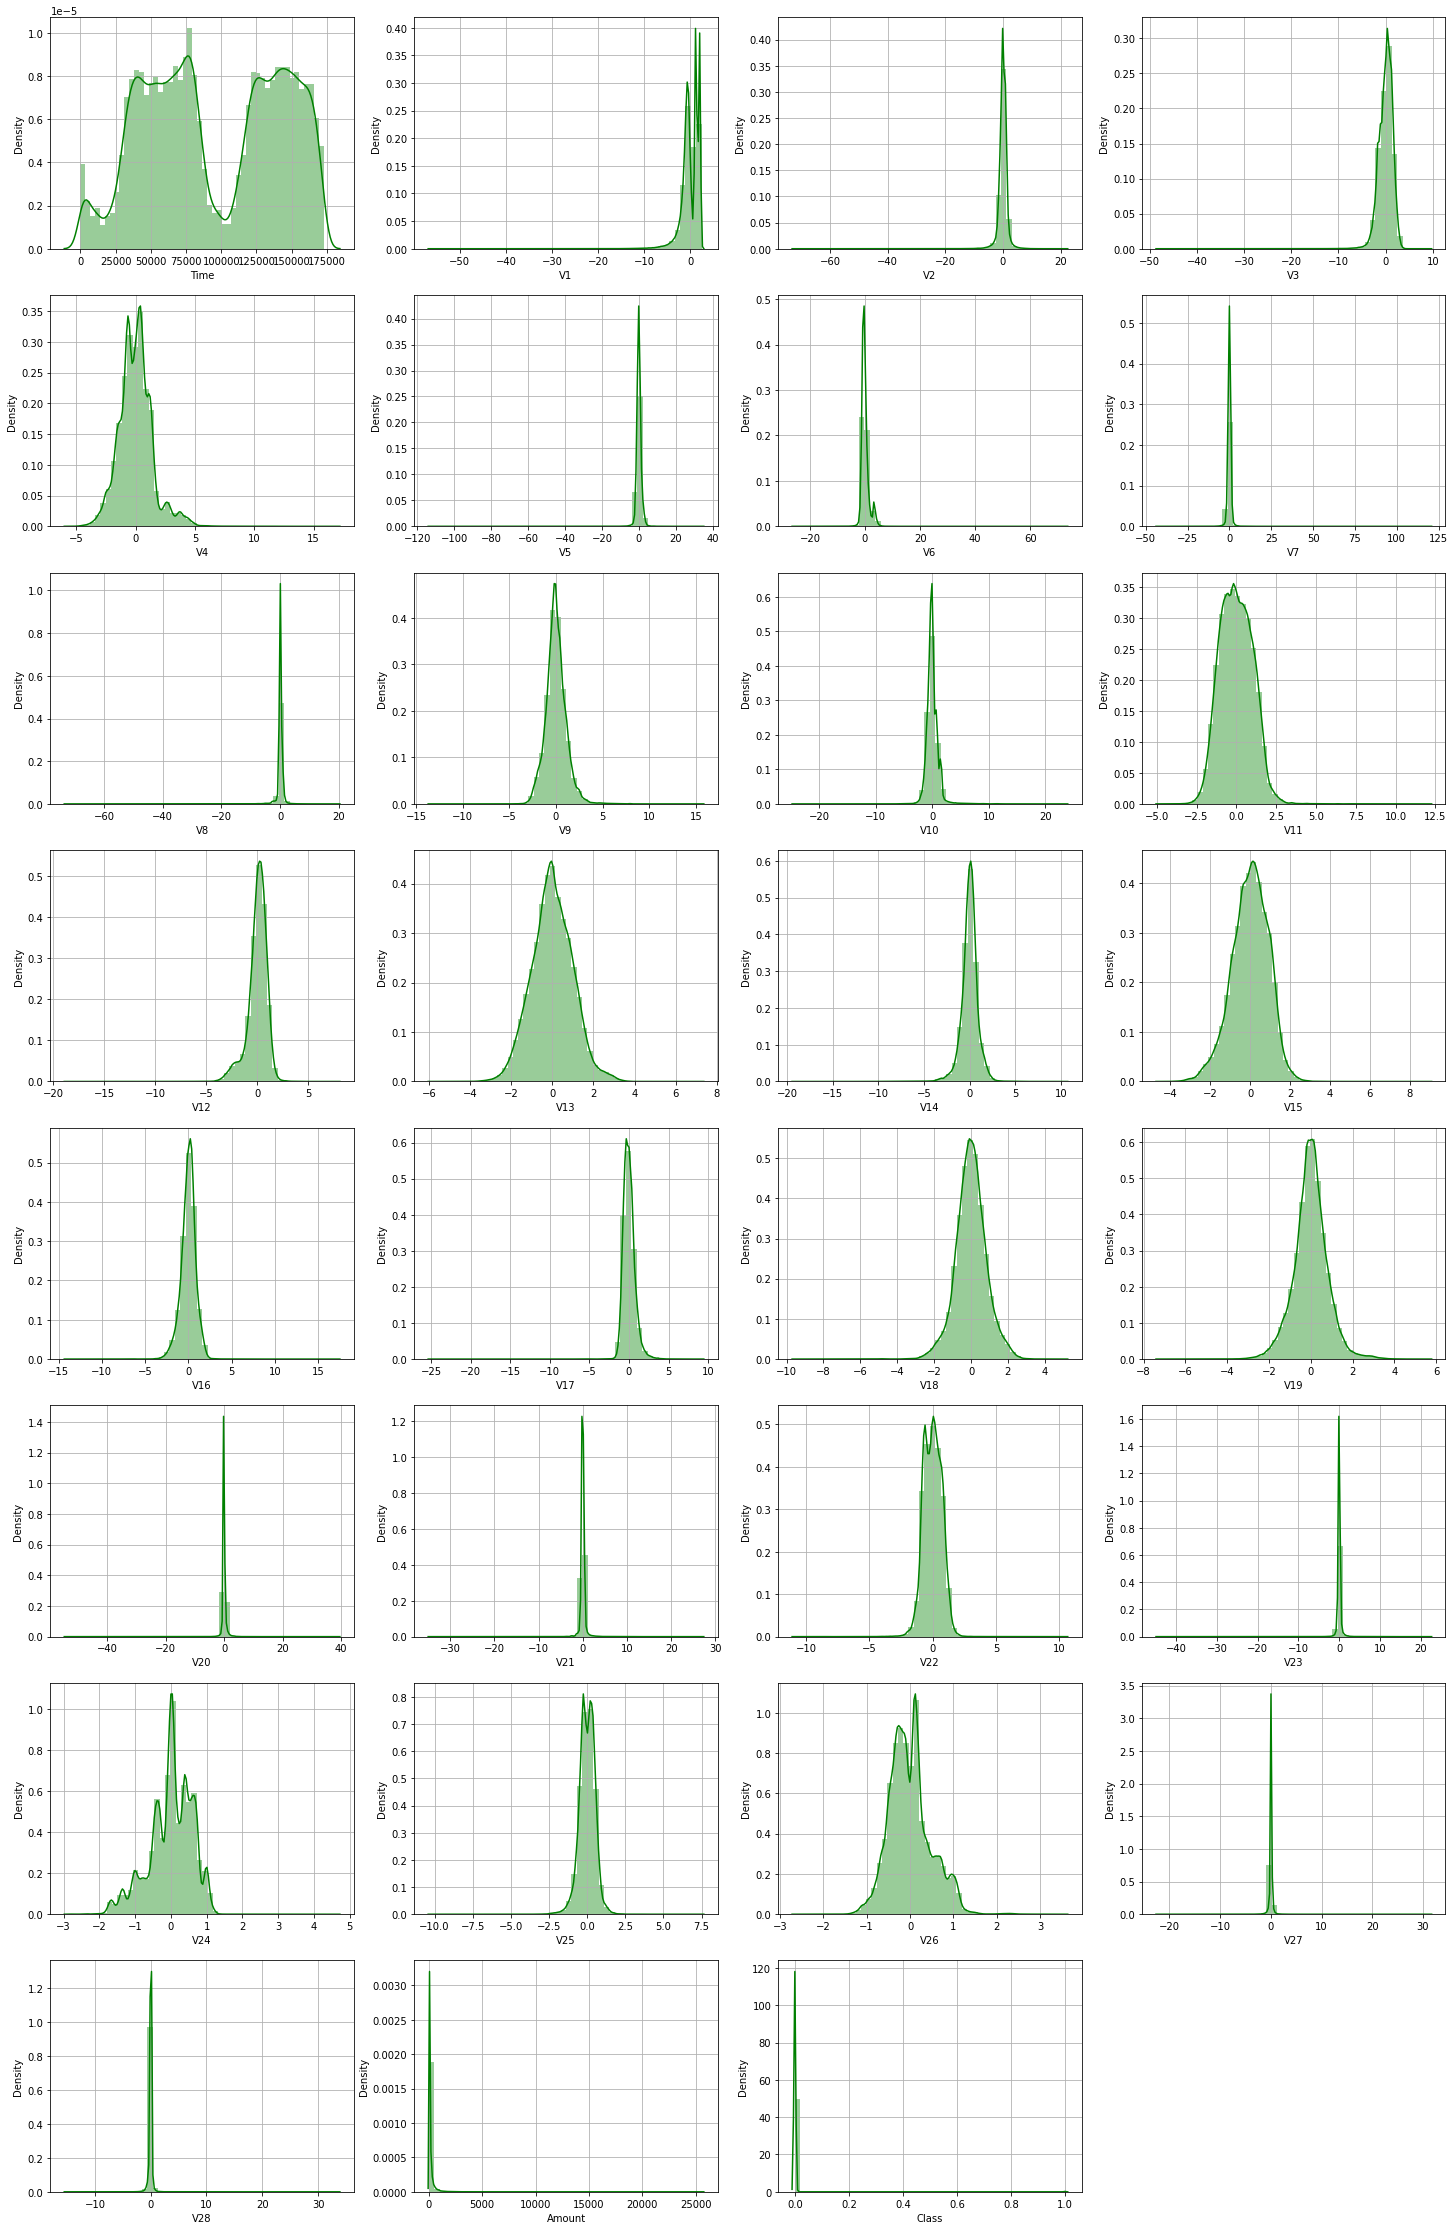

In [13]:
plt.figure(figsize = (25, 40))

for i in range(len(df.columns)):
    plt.subplot(8, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'green')
    plt.grid()

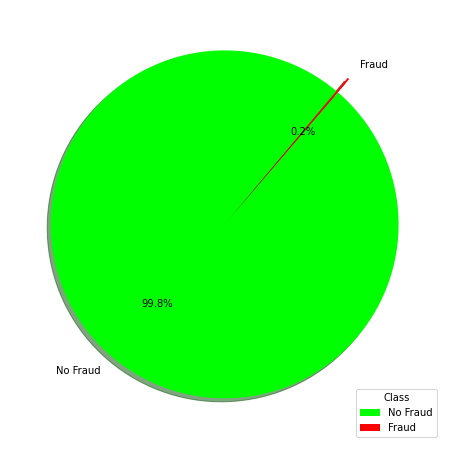

In [14]:
plt.figure(figsize = (10, 8))
plt.pie(df['Class'].value_counts(),labels=['No Fraud','Fraud'], autopct='%1.1f%%', explode = (0.0, 0.1),startangle=50 ,colors = ['lime','red'], shadow = True)
plt.legend(title = "Class", loc = 'lower right')
plt.show() 

<AxesSubplot:xlabel='Class', ylabel='Time'>

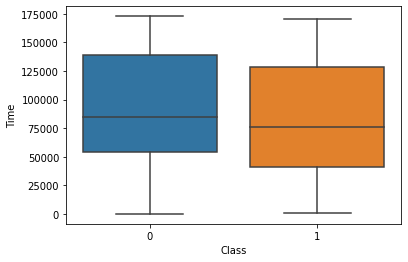

In [15]:
sns.boxplot(y = df.Time, x = df.Class)

<AxesSubplot:xlabel='Amount', ylabel='Count'>

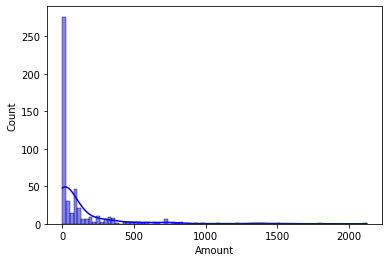

In [16]:
sns.histplot(data = fraud, x = 'Amount', color = 'blue', kde = True)

In [17]:
df.corr()["Class"]

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [18]:
x = df.drop(columns=['Class', 'Time', 'V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V23', 'V24'], axis=1)
y = df['Class']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print(classification_report(y_test, y_pred))
    
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels = ['No Fraud', 'Fraud'])
    cm.plot()

In [21]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.8461538461538461
Recall :  0.4489795918367347
Accuracy :  0.9989115550718023
F1 Score :  0.5866666666666667

[[56856     8]
 [   54    44]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.45      0.59        98

    accuracy                           1.00     56962
   macro avg       0.92      0.72      0.79     56962
weighted avg       1.00      1.00      1.00     56962



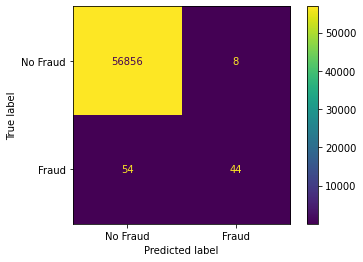

In [23]:
perform(y_pred_lr)

In [24]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [25]:
y_pred_nb = model_nb.predict(x_test)

Precision :  0.04241552839683681
Recall :  0.6020408163265306
Accuracy :  0.9759313226361434
F1 Score :  0.07924781732706514

[[55532  1332]
 [   39    59]] 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.04      0.60      0.08        98

    accuracy                           0.98     56962
   macro avg       0.52      0.79      0.53     56962
weighted avg       1.00      0.98      0.99     56962



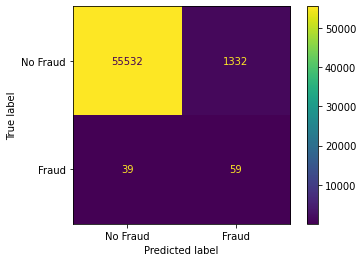

In [26]:
perform(y_pred_nb)

In [27]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  0.9508196721311475
Recall :  0.5918367346938775
Accuracy :  0.9992451107756047
F1 Score :  0.7295597484276729

[[56861     3]
 [   40    58]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.59      0.73        98

    accuracy                           1.00     56962
   macro avg       0.98      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



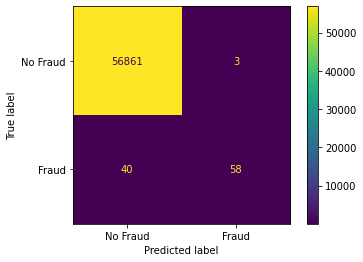

In [29]:
perform(y_pred_xgb)

In [30]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.6477272727272727
Recall :  0.5816326530612245
Accuracy :  0.998735999438222
F1 Score :  0.6129032258064516

[[56833    31]
 [   41    57]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.58      0.61        98

    accuracy                           1.00     56962
   macro avg       0.82      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



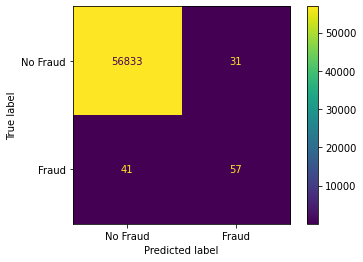

In [32]:
perform(y_pred_dt)

In [33]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9827586206896551
Recall :  0.5816326530612245
Accuracy :  0.9992626663389628
F1 Score :  0.7307692307692307

[[56863     1]
 [   41    57]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.58      0.73        98

    accuracy                           1.00     56962
   macro avg       0.99      0.79      0.87     56962
weighted avg       1.00      1.00      1.00     56962



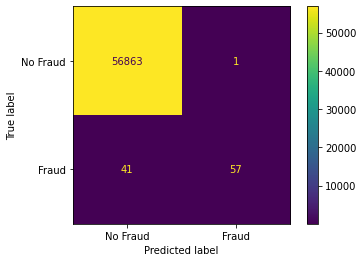

In [35]:
perform(y_pred_rf)

In [36]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [37]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.0
Recall :  0.0
Accuracy :  0.9982795547909132
F1 Score :  0.0

[[56864     0]
 [   98     0]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



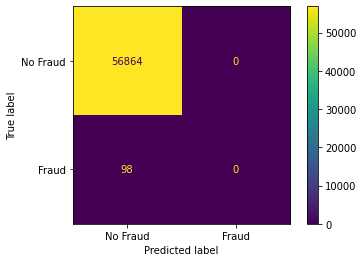

In [38]:
perform(y_pred_svc)

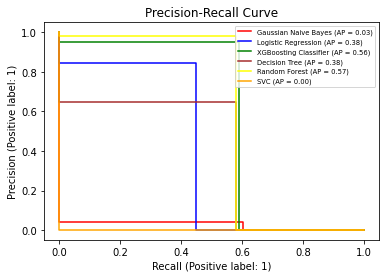

In [39]:
fig, ax = plt.subplots()
plt.title('Precision-Recall Curve')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, name = f'Gaussian Naive Bayes', ax=ax, color = 'red')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name = f'Logistic Regression', ax=ax, color = 'blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name = f'XGBoosting Classifier', ax=ax, color = 'green')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name = f'Decision Tree', ax=ax, color = 'brown')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name = f'Random Forest', ax=ax, color = 'yellow')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name = f'SVC', ax=ax, color = 'orange')
plt.legend(loc = 'best', fontsize = '6.8')

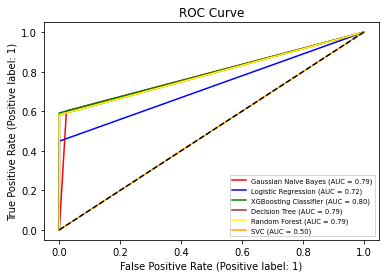

In [40]:
fig, ax = plt.subplots()
plt.title('ROC Curve')
RocCurveDisplay.from_predictions(y_test, y_pred_nb, name = f'Gaussian Naive Bayes', ax=ax, color = 'red')
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name = f'Logistic Regression', ax=ax, color = 'blue')
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name = f'XGBoosting Classifier', ax=ax, color = 'green')
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name = f'Decision Tree', ax=ax, color = 'brown')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name = f'Random Forest', ax=ax, color = 'yellow')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name = f'SVC', ax=ax, color = 'orange')
plt.plot([0, 1], [0, 1], linestyle = "--", color = 'black')
plt.legend(loc = 'best', fontsize = '6.8')